In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import sklearn.linear_model
import statsmodels.api as sm
import re
import os.path
import scipy.stats

%matplotlib inline

In [307]:
%run /Users/regevschweiger/git/matrix_shuffle/src/fisher.py

<Figure size 432x288 with 0 Axes>

In [325]:
batch_name = "run_20210609_sgd_reg=0_shuffle_nojacsmoothing"
output_path = os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/", batch_name)

target_hist = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/counts.txt", sep="\t")
dcounts = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/dcounts.txt", sep="\t")

try:
    thetas = pd.read_csv(os.path.join(output_path, "output.10000000000.thetas"), sep="\s+", header=None).values
    hists = pd.read_csv(os.path.join(output_path, "output.10000000000.hists"), sep="\s+", header=None).values
    thetas_ratio = np.maximum(np.log(target_hist.p.values[:-1]) - np.log(dcounts.p.values[:-1]), -10000)
    thetas_ratio[np.isnan(thetas_ratio)] = -10000
except:
    pass

<ipython-input-325-747beb661d35>:10: RuntimeWarning: divide by zero encountered in log
  thetas_ratio = np.maximum(np.log(target_hist.p.values[:-1]) - np.log(dcounts.p.values[:-1]), -10000)
<ipython-input-325-747beb661d35>:10: RuntimeWarning: invalid value encountered in subtract
  thetas_ratio = np.maximum(np.log(target_hist.p.values[:-1]) - np.log(dcounts.p.values[:-1]), -10000)


In [326]:
pts = pd.read_csv(
    os.path.join(output_path, "output.10000000000"), 
    sep="\s+", header=None)

hp = np.histogram(np.diff(pts, axis=1), bins=target_hist.value)[0]


Text(0, 0.5, '#')

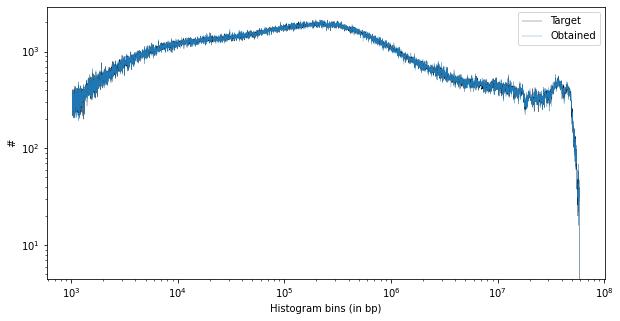

In [327]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1], 'k', label="Target", lw=0.3)
plt.plot(target_hist.value[1:-1], hp[1:], label="Obtained", lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")
#plt.axvline((59109222/100), c='g', lw=0.5)

Text(0, 0.5, '#')

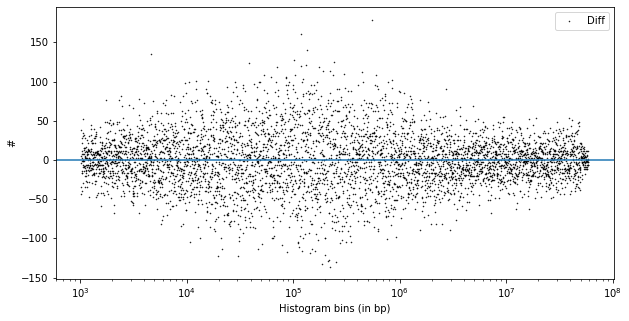

In [328]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], (target_hist.p[1:-1] - hp[1:]), 'k.', label="Diff", ms=1)
plt.axhline(0)
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")
#plt.axvline((59109222/100), c='g', lw=0.5)

  0%|          | 0/4999 [00:00<?, ?it/s]

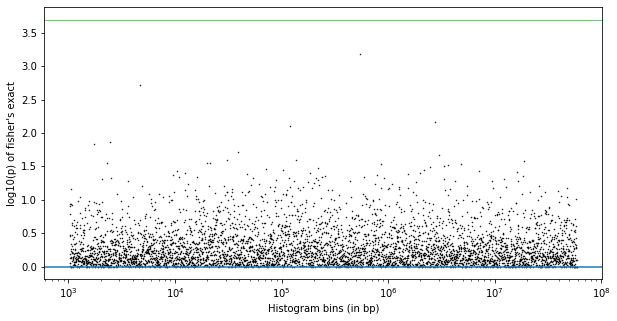

In [334]:
ps = np.array([mlog10Test1t(x, hp.sum()-x, y, hp.sum()-y) for x,y in zip(tqdm.notebook.tqdm(target_hist.p[1:-1]), hp[1:])])
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], ps, 'k.', ms=1)
plt.axhline(0)
plt.xscale("log")
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("log10(p) of fisher's exact")
plt.axhline(np.log10(len(target_hist.p)), c='g', lw=0.5)

Text(0, 0.5, '%%')

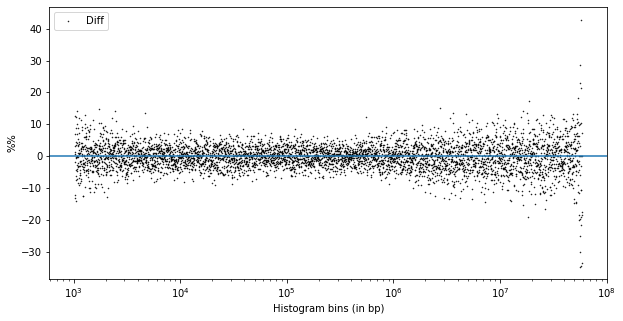

In [330]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], (target_hist.p[1:-1] - hp[1:])/target_hist.p[1:-1]*100, 'k.', label="Diff", ms=1)
plt.axhline(0)
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("%%")
#plt.axvline((59109222/100), c='g', lw=0.5)

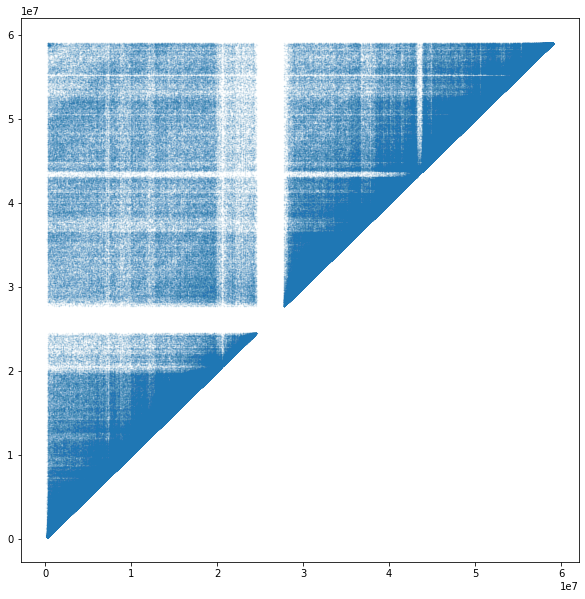

In [331]:
plt.figure(figsize=(10,10))
plt.plot(
    pts.values[:,0],
    pts.values[:,1],
    '.',
    ms=1,
    alpha=0.1
)

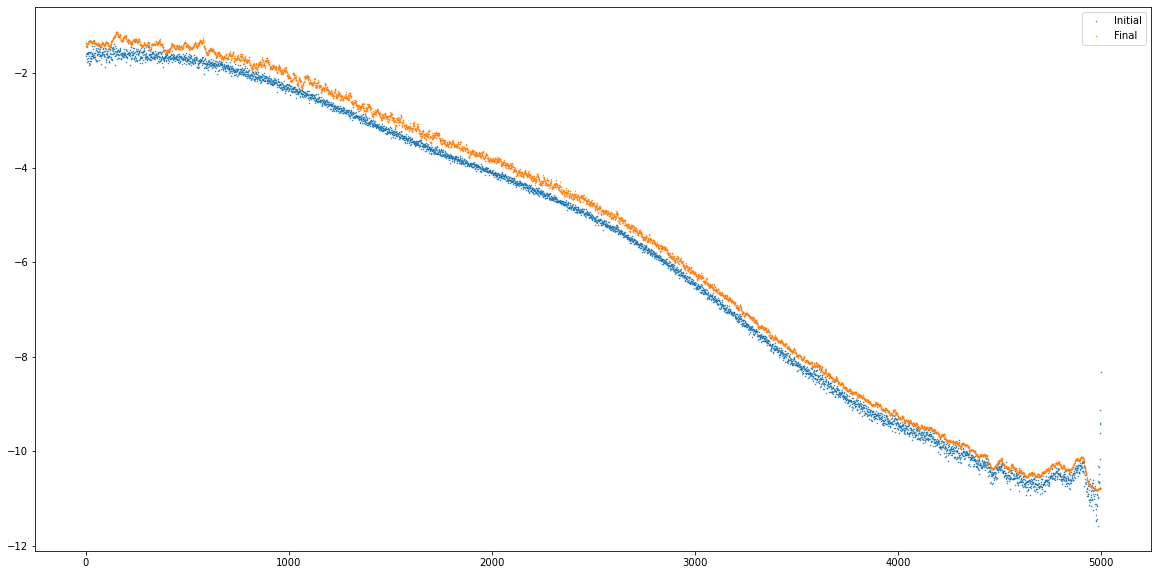

In [254]:
plt.figure(figsize=(20,10))
plt.plot(thetas_ratio[1:-1], '.', ms=1, label="Initial")
plt.plot(thetas[-1][1:-1] , '.', ms=1, label="Final")
plt.legend()
#plt.ylim(-12,0)

(-1.0, 1.0)

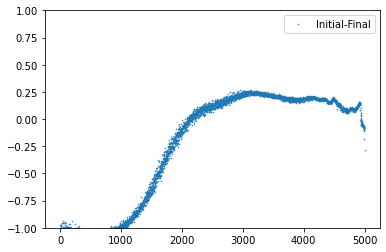

In [53]:
plt.figure()

#plt.plot(thetas_ratio[:-2] - thetas[500][1:-1], '.', ms=1, label="Initial-Mid")
#
plt.plot(thetas_ratio[:-2] - thetas[800][1:-1], '.', ms=1, label="Initial-Final")

plt.legend()
plt.ylim(-1,1)

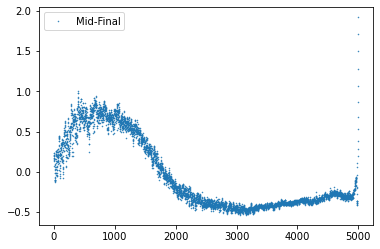

In [774]:
plt.figure()

plt.plot(thetas[800][1:-1] - thetas[-1][1:-1], '.', ms=1, label="Mid-Final")

plt.legend()
#plt.ylim(-1,1)

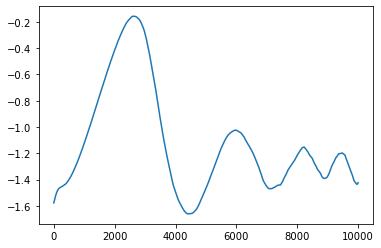

In [255]:
plt.figure()
plt.plot(thetas[:,1])
#plt.plot(thetas[:,1001])


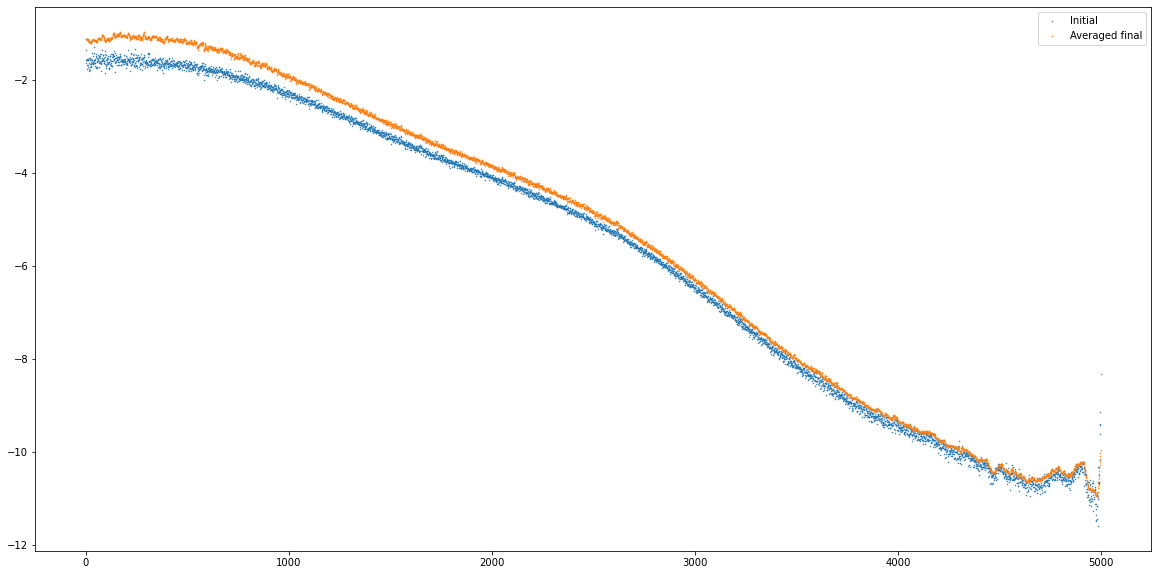

In [257]:
plt.figure(figsize=(20,10))
plt.plot(thetas_ratio[1:-1], '.', ms=1, label="Initial")
#plt.plot(thetas[-1][1:-1] , '.', ms=1, label="Final")
plt.plot(thetas[-10000:,1:-1].mean(axis=0) , '.', ms=1, label="Averaged final")
plt.legend()
#plt.ylim(-12,0)

In [256]:
pd.DataFrame(data={"value": target_hist["value"].values[:-1], "theta": thetas[-1,:]})\
    .to_csv(os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/run_20210524_sgd_reg=1000000_shuffle", 
                         "initial_thetas_last.tsv"), index=False, header=True, sep="\t")


In [227]:
pd.DataFrame(data={"value": target_hist["value"].values[:-1], "theta": thetas[-10000:,:].mean(axis=0)})\
    .to_csv(os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/run_20210610_sgd_long", 
                         "initial_thetas.tsv"), index=False, header=True, sep="\t")


In [146]:
pd.DataFrame(data={"value": target_hist["value"].values[:-1], "theta": thetas_ratio})\
    .to_csv(os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/run_20210609_sgd_reg=0_shuffle_nojacsmoothing", 
                         "initial_thetas_ratio.tsv"), index=False, header=True, sep="\t")

In [189]:
pd.DataFrame(data={"value": target_hist["value"].values[:-1], "theta": np.maximum(-10000, np.log(np.exp(thetas[-2000:,:]).mean(axis=0)))})\
    .to_csv(os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/run_20210609_sgd_reg=0_shuffle_nojacsmoothing", 
                         "initial_thetas_expmean.tsv"), index=False, header=True, sep="\t")


<ipython-input-189-db7be044a2d2>:1: RuntimeWarning: divide by zero encountered in log
  pd.DataFrame(data={"value": target_hist["value"].values[:-1], "theta": np.maximum(-10000, np.log(np.exp(thetas[-2000:,:]).mean(axis=0)))})\


In [188]:
np.maximum(-10000, np.log(np.exp(thetas[-2000:,:]).mean(axis=0)))

<ipython-input-188-1d0d8da751ba>:1: RuntimeWarning: divide by zero encountered in log
  np.maximum(-10000, np.log(np.exp(thetas[-2000:,:]).mean(axis=0)))


array([-1.00000000e+04, -1.46299122e+00, -1.49790434e+00, ...,
       -9.77040132e+00, -8.72854555e+00, -1.00000000e+04])

In [145]:
output_path

'/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/run_20210609_mh_from_initial'

In [103]:
dcounts

,value,p
0,0.000000e+00,0.0
1,1.024000e+03,1968.0
2,1.026248e+03,1155.0
3,1.028501e+03,1330.0
4,1.030759e+03,1917.0
...,...,...
4996,5.850455e+07,332544.0
4997,5.863298e+07,168513.0
4998,5.876170e+07,24621.0
4999,5.889069e+07,171.0


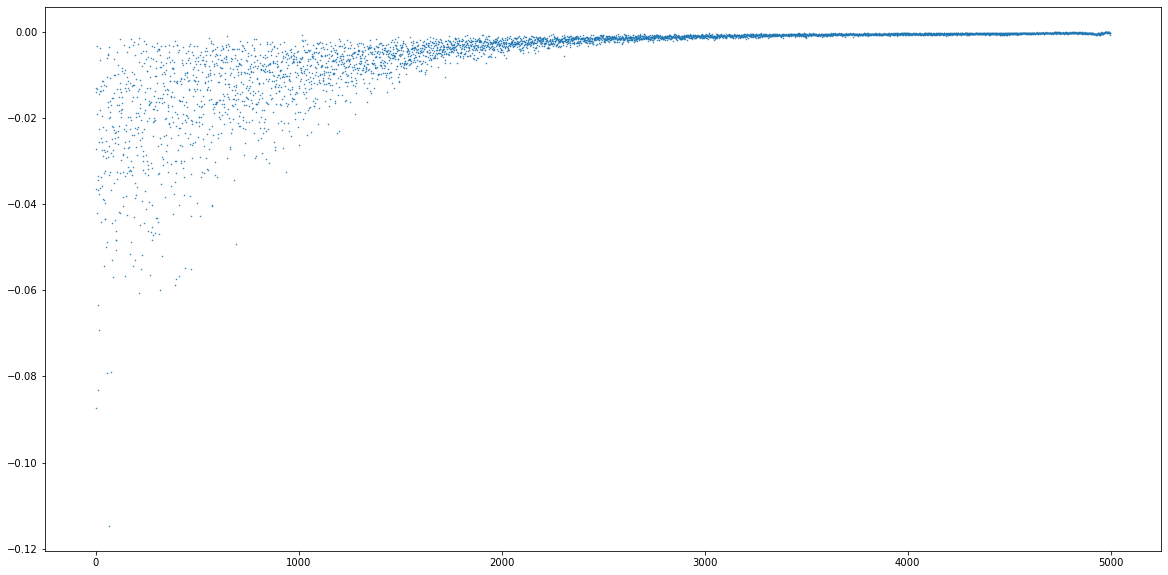

In [184]:
plt.figure(figsize=(20,10))
#plt.plot(thetas_ratio[1:-1], '.', ms=1, label="Initial")
plt.plot(thetas[-2000:,1:-1].mean(axis=0) - 
         np.log(np.exp(thetas[-2000:,1:-1]).mean(axis=0)) , '.', ms=1, label="Exp-Averaged final")
#plt.legend()
#plt.ylim(-12,0)